# Simulation of the Ising modell for zero field

## setup

In [1]:
include("../src/ising.jl")
using CairoMakie
using JLD2

## Anaylsis

In [2]:
data = load("../data/finite_size_scaling_large.jld2")

Dict{String, Any} with 4 entries:
  "grid_sizes"     => [10, 12, 14, 16, 18, 20, 22]
  "temps"          => Any[[4.2, 4.20606, 4.21212, 4.21818, 4.22424, 4.2303, 4.2…
  "energies"       => Any[([-1630.3, -1611.09, -1620.32, -1610.74, -1591.65, -1…
  "magnetisations" => Any[([0.655217, 0.645925, 0.650806, 0.647672, 0.639724, 0…

In [3]:
grid_sizes = data["grid_sizes"]
temps = data["temps"]
energies = data["energies"]
magnetisations = data["magnetisations"];

### plot data directly

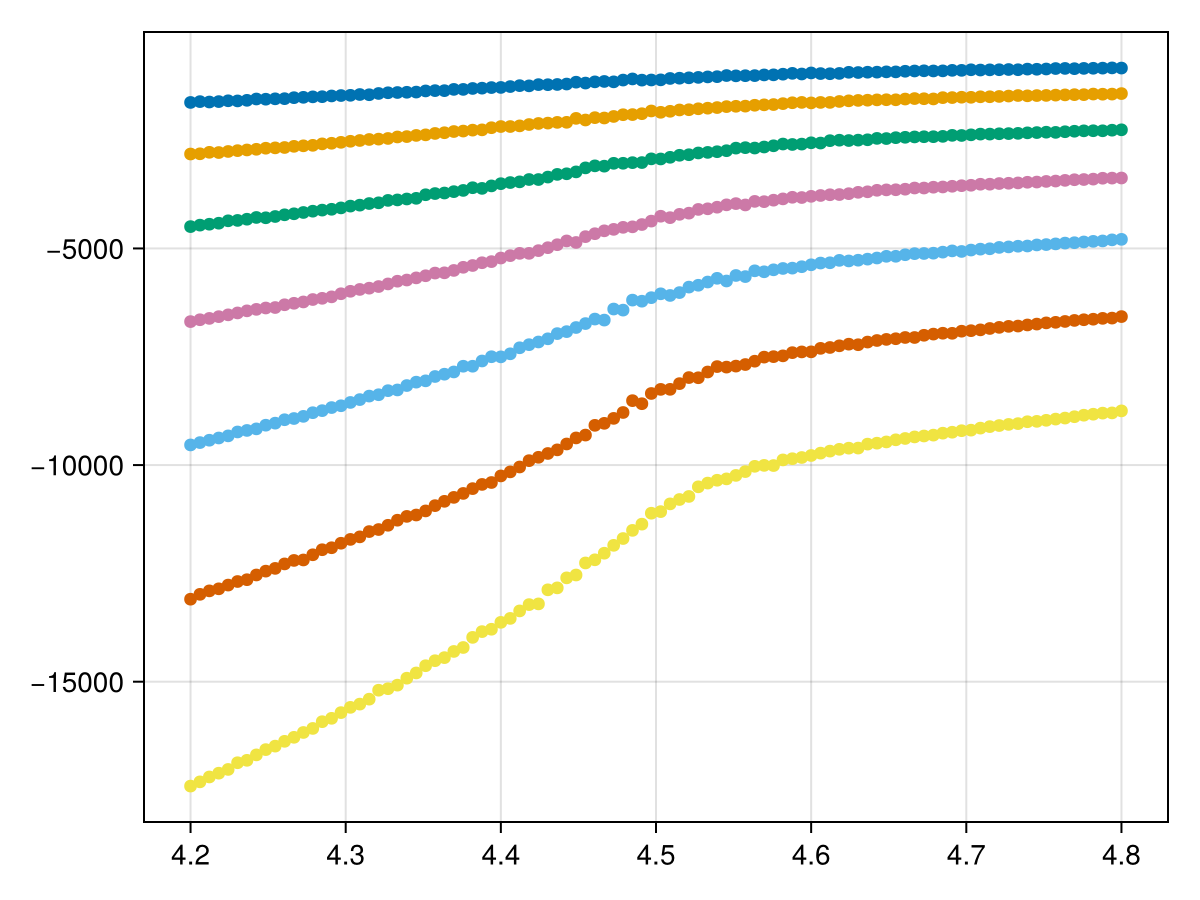

In [4]:
fig = Figure()
ax = Axis(fig[1,1])
for (grid_size, energies_, temps_) in zip(grid_sizes, energies, temps)
    plot!(ax, temps_, energies_[1], label="L = $grid_size")
end
fig

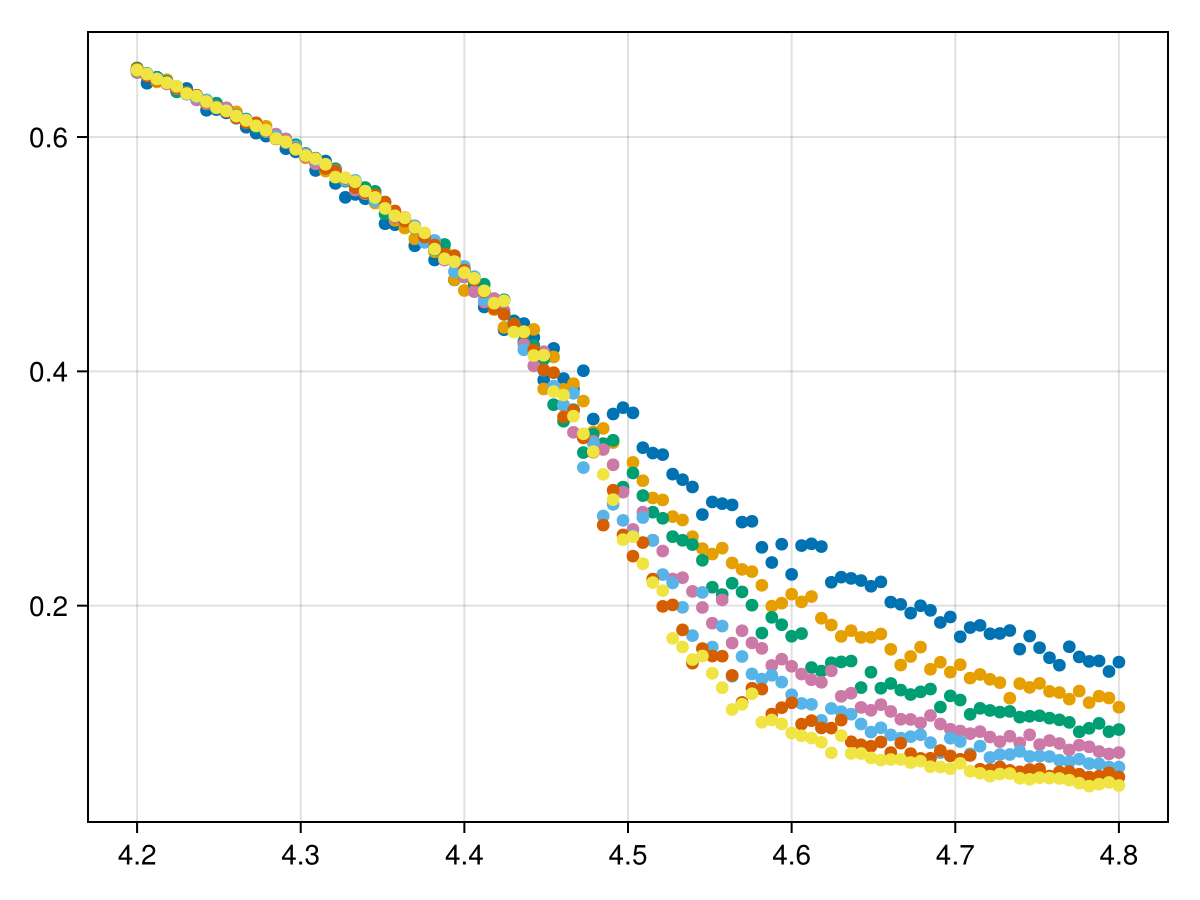

In [5]:
fig = Figure()
ax = Axis(fig[1,1])
for (grid_size, magnetisations_, temps_) in zip(grid_sizes, magnetisations, temps)
    plot!(ax, temps_, abs.(magnetisations_[1]), label="L = $grid_size")
end
fig

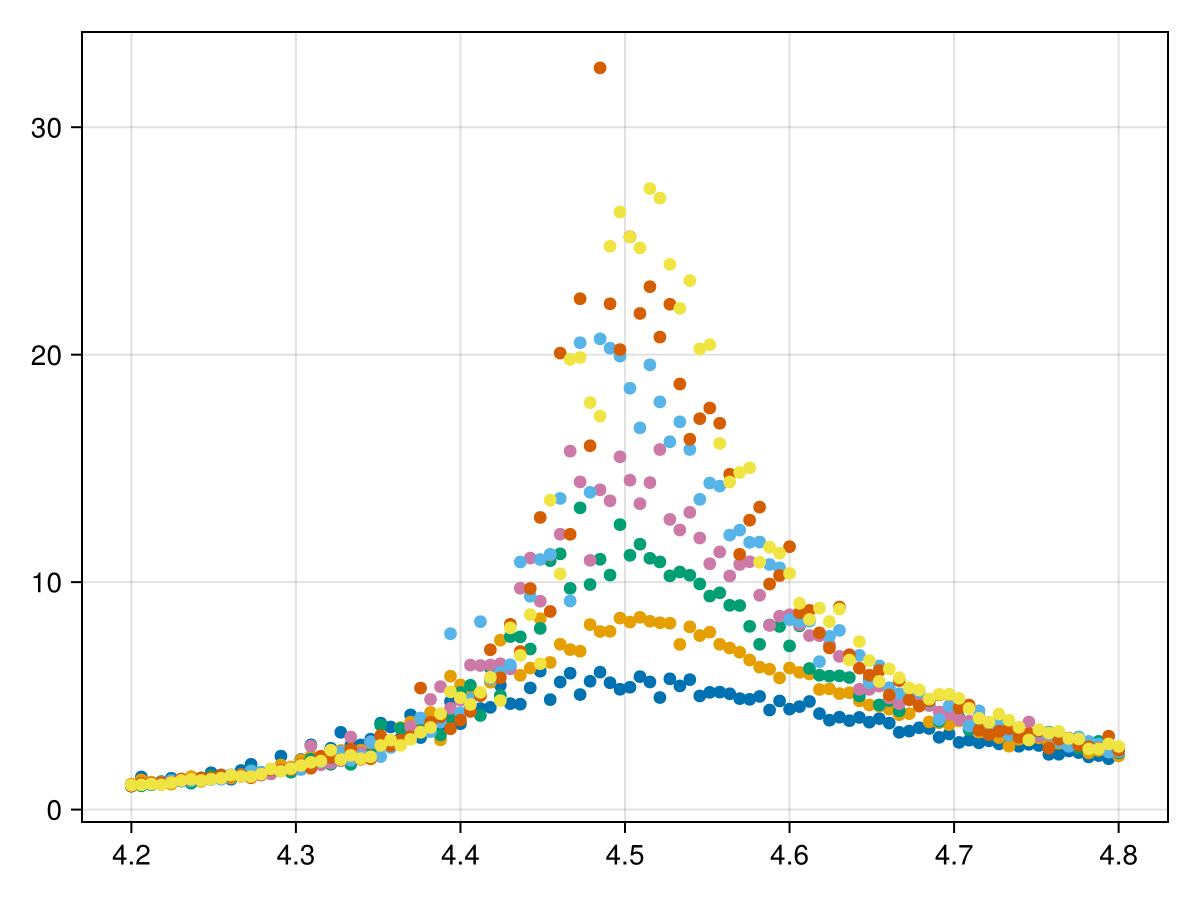

In [6]:
fig = Figure()
ax = Axis(fig[1,1])
susceptibilities = []
for (grid_size, magnetisations_, temps_) in zip(grid_sizes, magnetisations, temps)
    susceptibilities_ = magnetisations_[2] .^2 ./ temps_ .* grid_size^3
    push!(susceptibilities, susceptibilities_)
    plot!(temps_, susceptibilities_, label="L = $grid_size")
end
fig

### try to fit critical exponents $\gamma$ and $\nu$

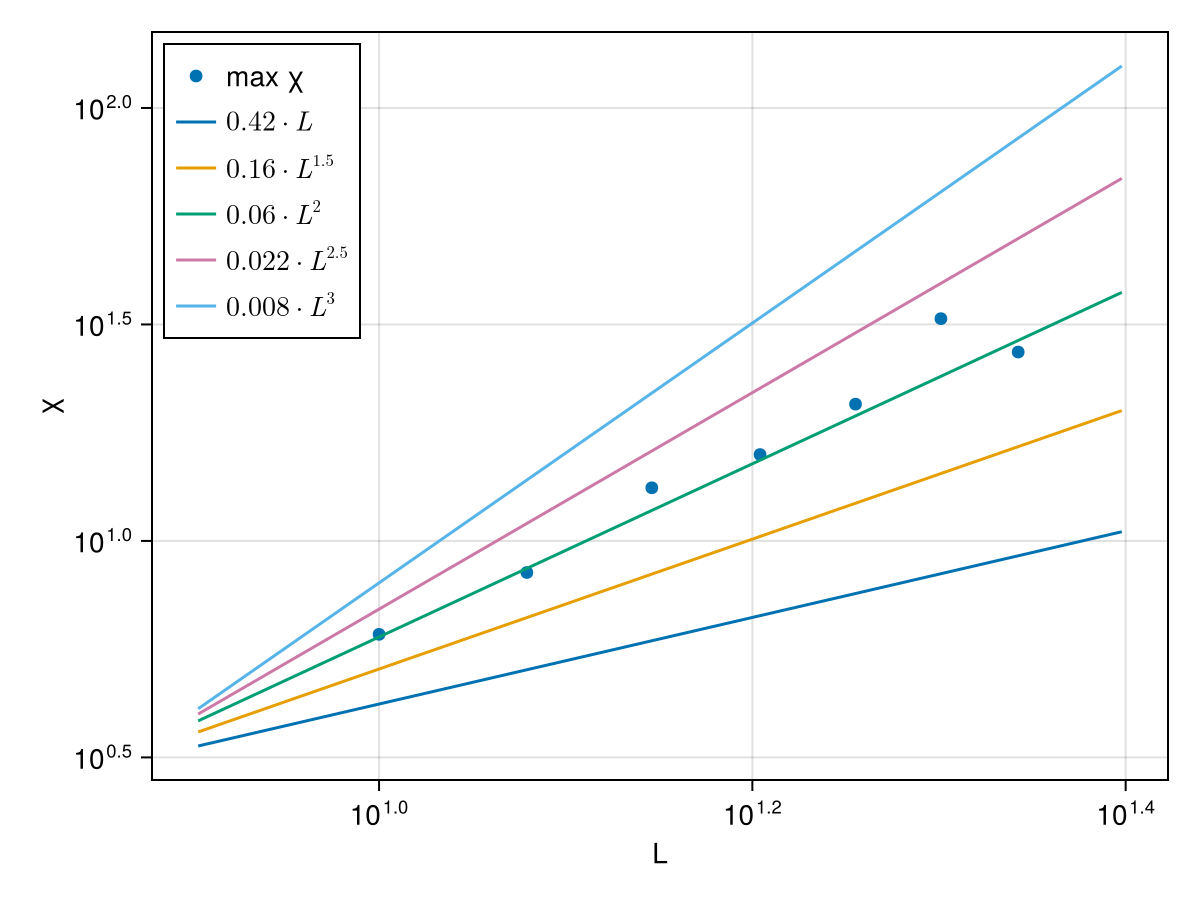

In [7]:
fig = Figure()
ax = Axis(fig[1,1], xscale = log10, yscale = log10, xlabel="L", ylabel="χ")
plot!(ax, grid_sizes, maximum.(susceptibilities), label="max χ")

x = range(8,25,500)
lines!(ax, x, 0.42*x, label=L"0.42 \cdot L")
lines!(ax, x, 0.16*x.^1.5, label=L"0.16 \cdot L ^ {1.5}")
lines!(ax, x, 0.06*x.^2, label=L"0.06 \cdot L ^ {2}")
lines!(ax, x, 0.022*x.^2.5, label=L"0.022 \cdot L ^ {2.5}")
lines!(ax, x, 0.008*x.^3, label=L"0.008 \cdot L ^ {3}")


axislegend(ax, position = :lt)

fig

$\gamma/\nu \approx 2$ 

In [8]:
T_c = 4.5115

function comp_gamma_nu(gamma,nu)
    fig = Figure()
    ax = Axis(fig[1,1], xscale = log10, yscale = log10, xlabel=L"(T - T_c) L^{1/\nu}", ylabel=L"\chi L^{-\gamma/\nu}")
    # x, y = [], []
    for (grid_size, susceptibilities_, temps_) in zip(grid_sizes, susceptibilities, temps)
        x_ = (temps_ .- T_c) .* grid_size^(1/nu)
        y_ = susceptibilities_ .* grid_size^(-gamma/nu)
        
        # remove values below 0
        y_ = y_[x_ .> 0]
        x_ = x_[x_ .> 0]

        plot!(ax, x_, y_, label="L = $grid_size")
        
        # push!(x, x_)
        # push!(y, y_)
    end
    axislegend(ax, position = :rt)
    return fig
end

comp_gamma_nu (generic function with 1 method)

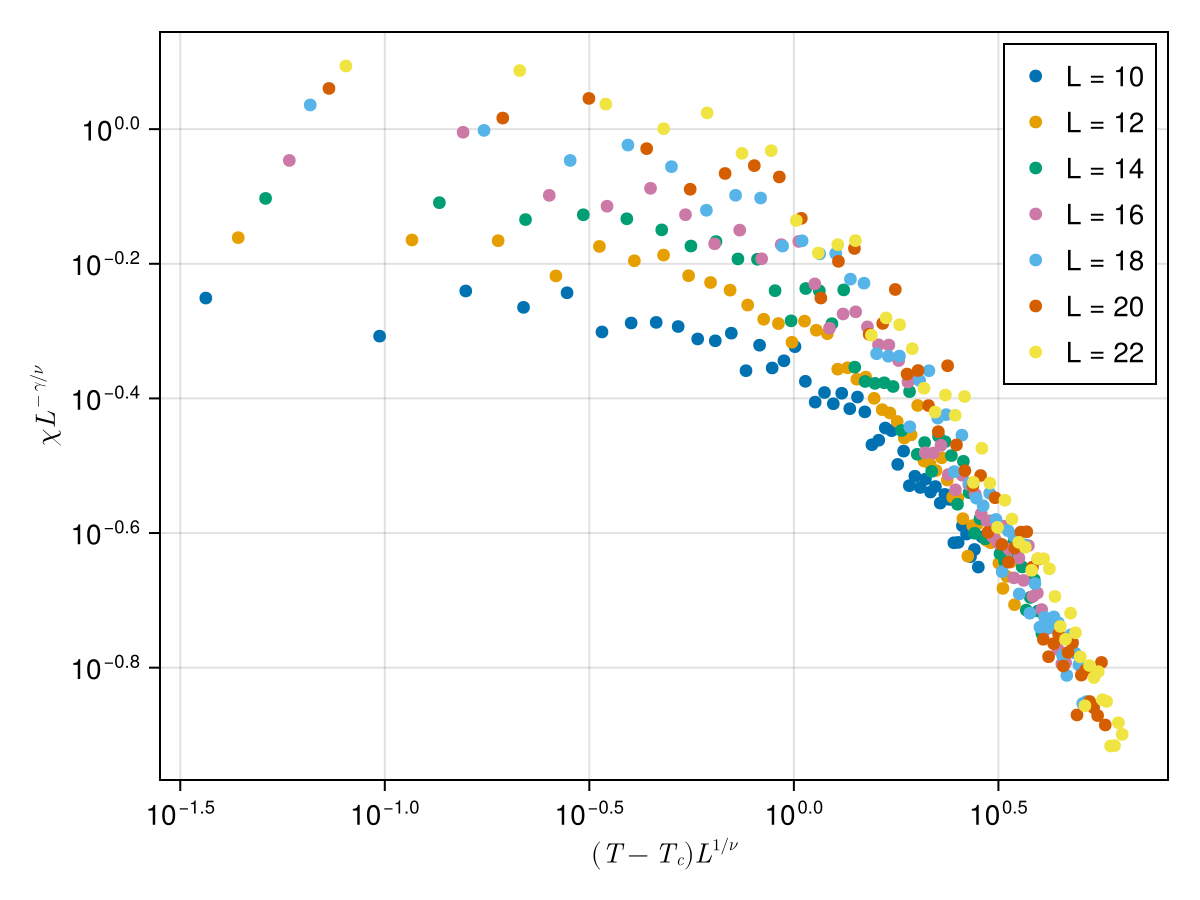

In [9]:
# test with gamma = 1, nu = 1
comp_gamma_nu(1.0, 1.0)

#### multiple configurations with $\gamma/\nu = 2$

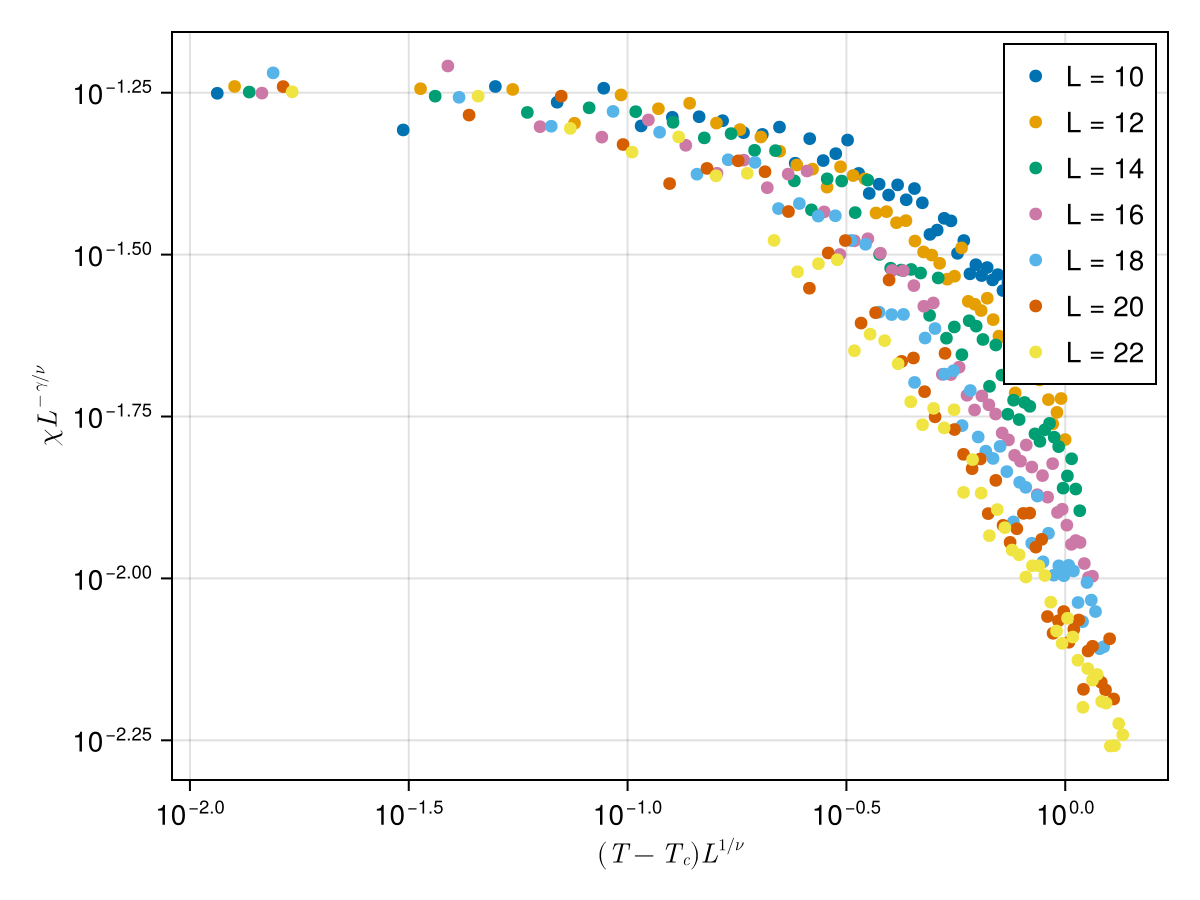

In [10]:
comp_gamma_nu(4.0, 2.0)

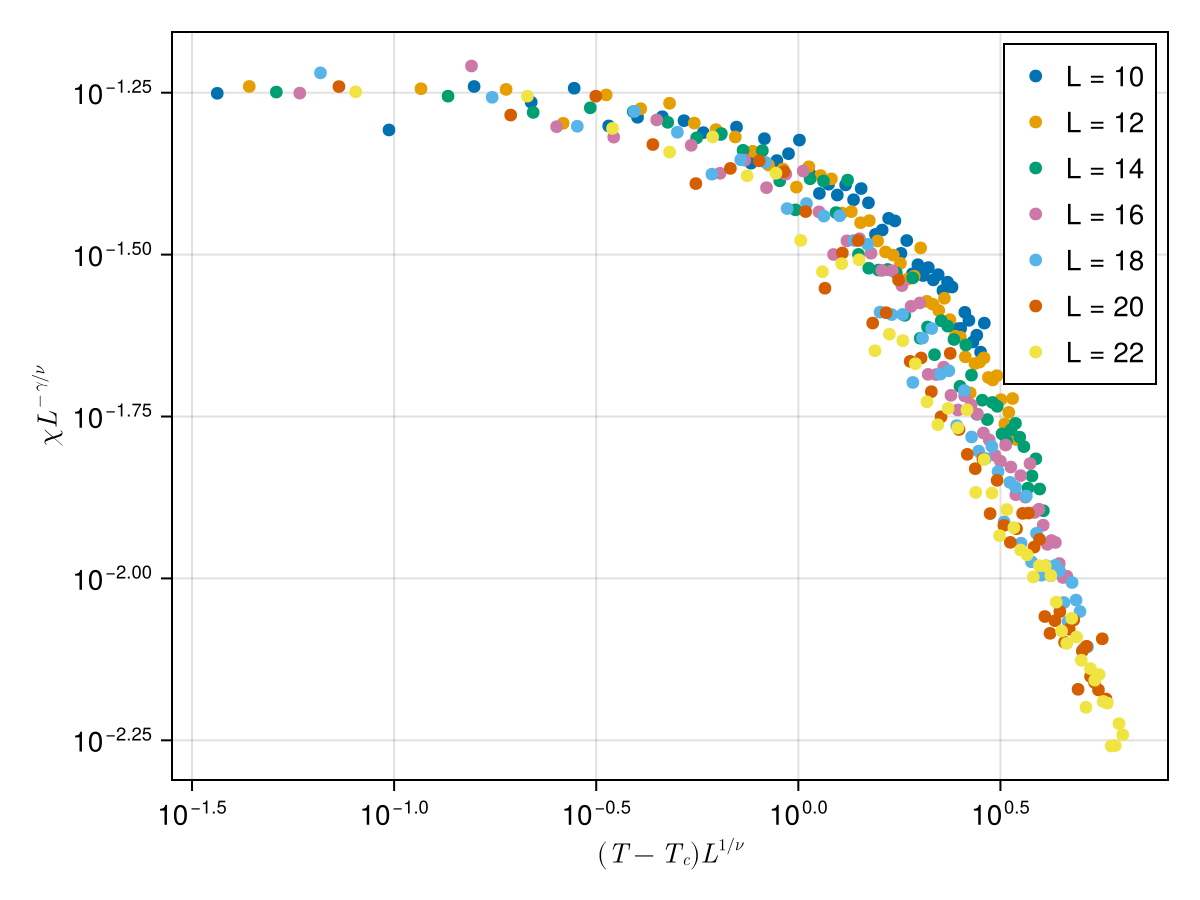

In [11]:
comp_gamma_nu(2.0, 1.0)

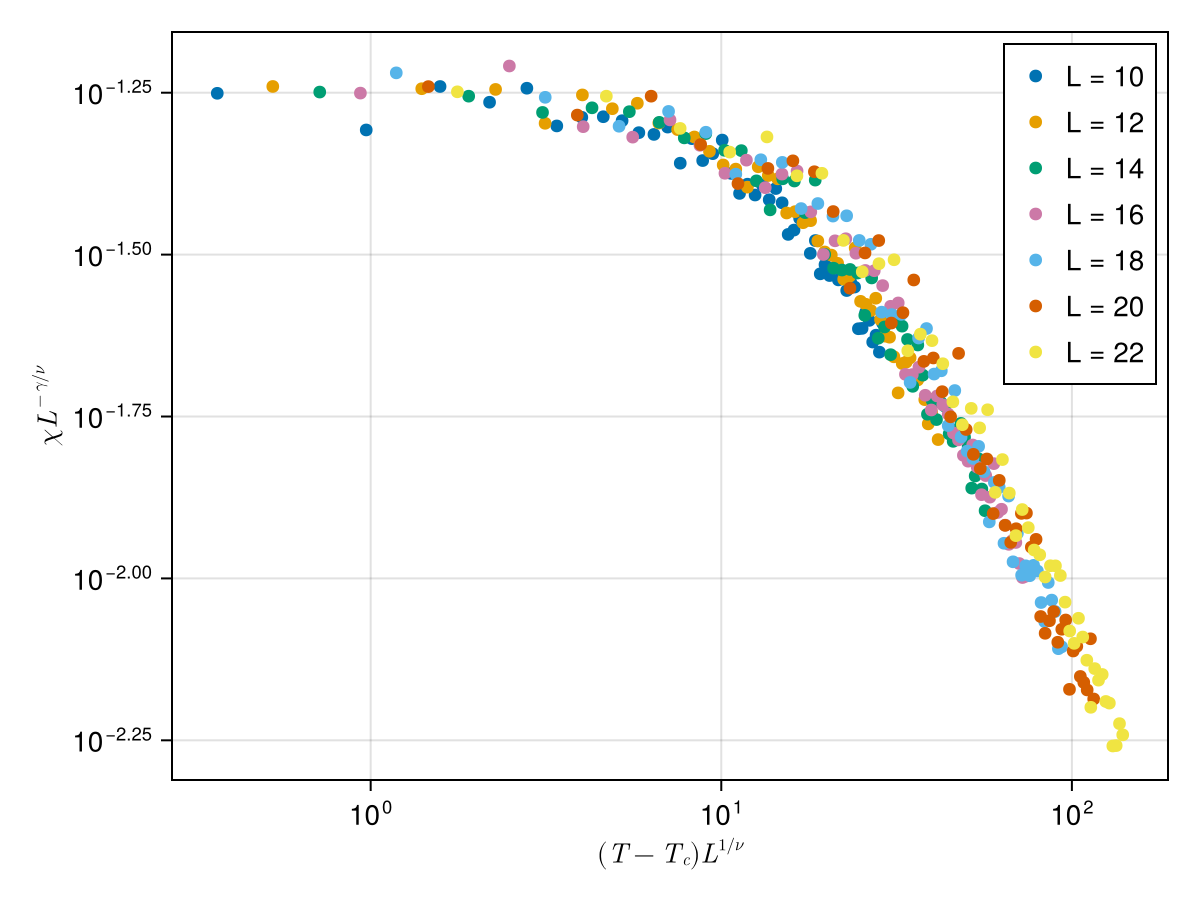

In [12]:
comp_gamma_nu(1.0, 0.5)

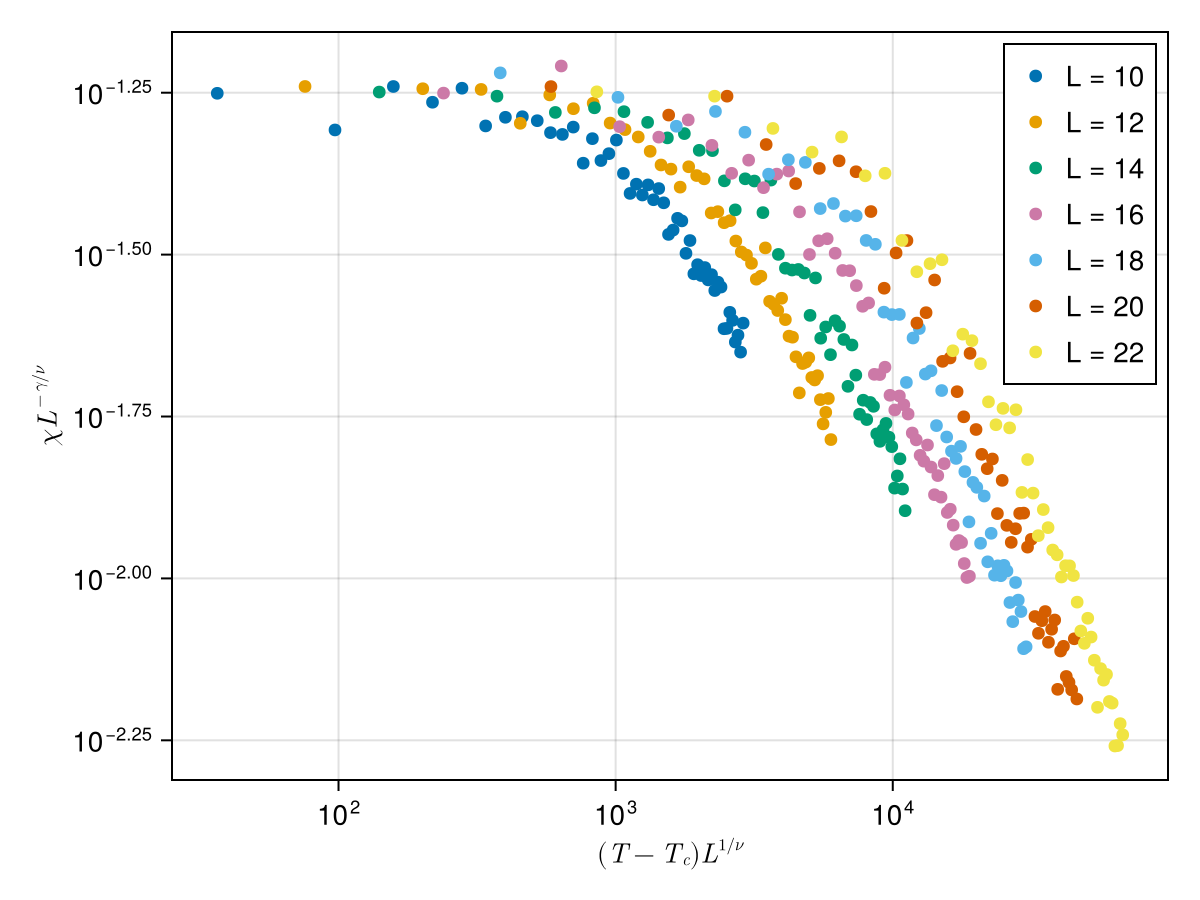

In [13]:
comp_gamma_nu(0.5, 0.25)

2.0,1.0 and 1.0,0.5 looked best. test somewhere in between

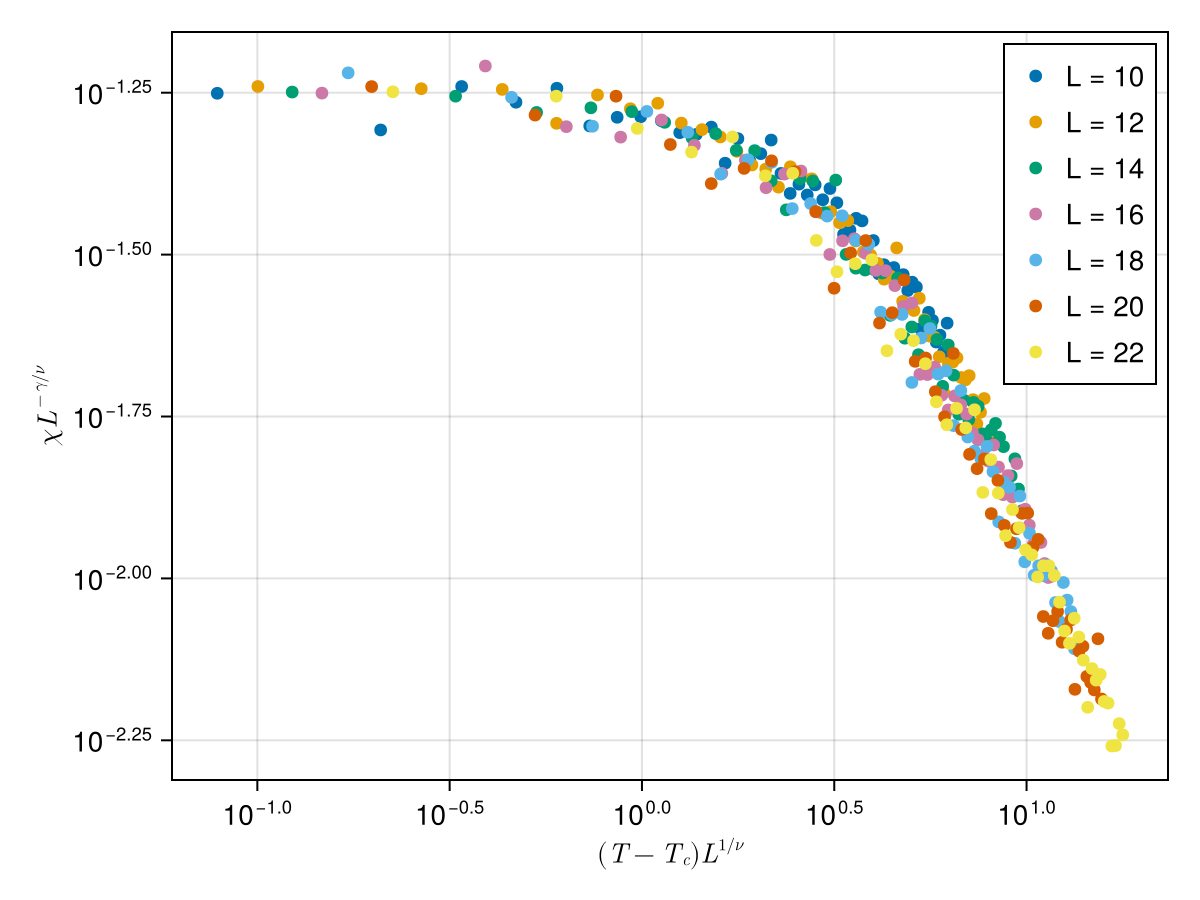

In [14]:
comp_gamma_nu(1.5, 0.75)

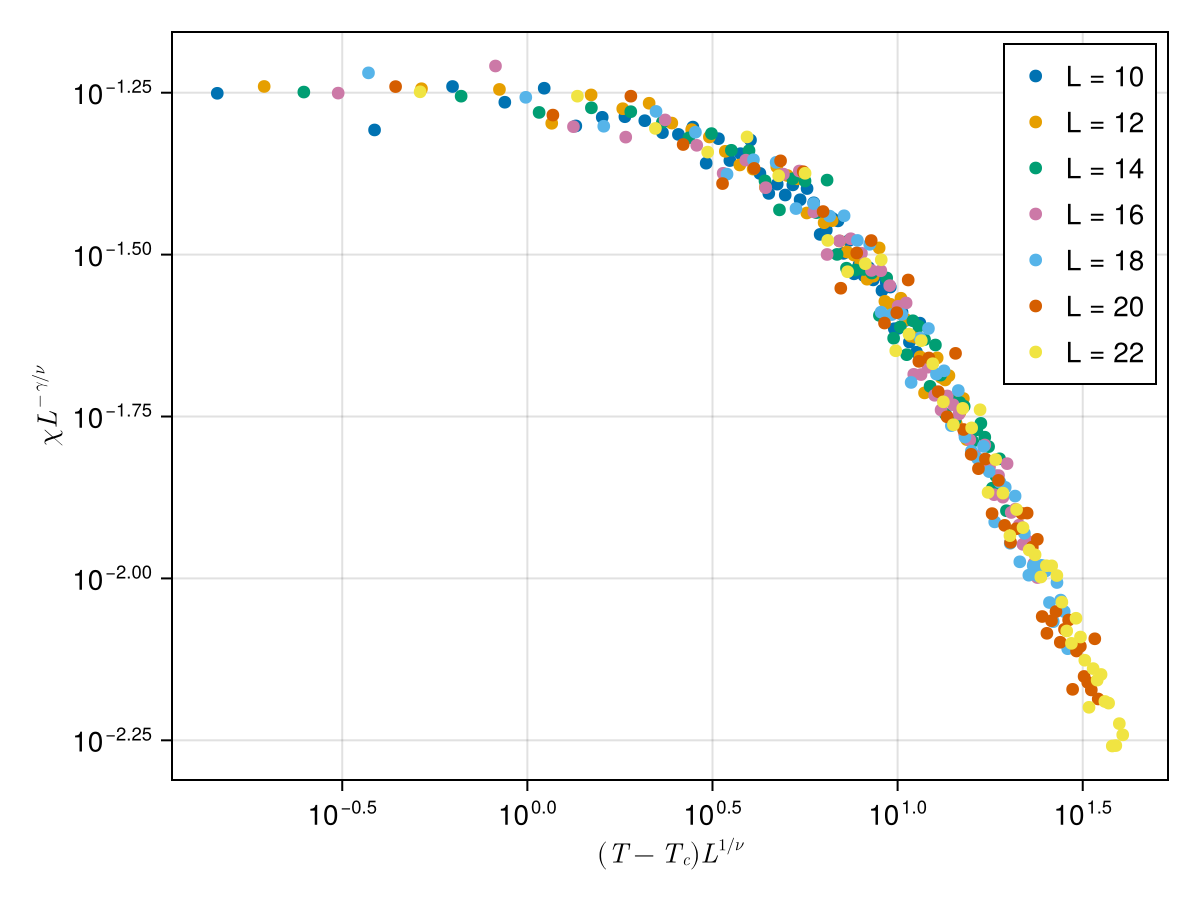

In [15]:
comp_gamma_nu(1.25, 0.625)

looks good. run with literature values as well

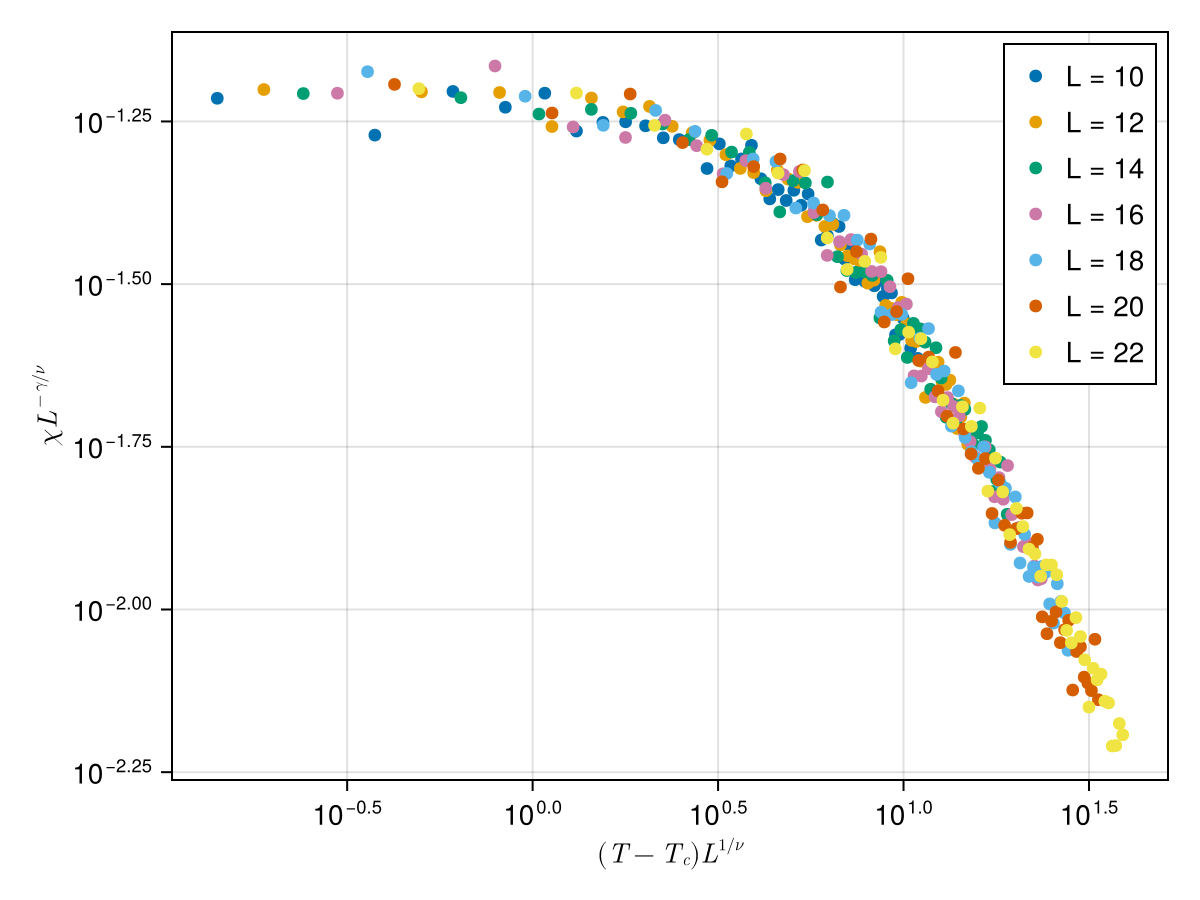

In [16]:
comp_gamma_nu(1.237, 0.630)